# Computer Graphics
## Intersections of Line Segments with circles
We said earlier that a line segment in *parametric form* is defined by its two endpoints $P_1$ and $P_2$:
<br> $P(t)=P_1+t(P_2-P_1)$, $t\in[0, 1]$
<br> Where $t$ is the *parameter* of the line segment.
Also ,we mentioned that in Catersian coordinates, a circle with center $(x_0,y_0)$ and radius $r$ are the points that satisfy the following equation:
<br>$(x-x_0)^2+(y-y_0)^2=r^2$
<br>This time, we want to find the intersection of line segments with circles.
<br>The formulas for intersection points of line segments with circles are included in the **Pinterest** page mentioned below.
<br>**Hint:** You can extend the **Python** code here to find the intersection of line segments and spheres in 3D space. 
<br>by Hamed Shah-Hosseini, Twitter:@chekaad, Instagram:@ostad.ai
<br>https://github.com/ostad-ai/Computer-Graphics
<br>Explanation in **English**:
    https://www.pinterest.com/HamedShahHosseini/Computer-Graphics

In [1]:
# importing required modules
import random
from math import sqrt
from matplotlib import pyplot as plt

In [2]:
#solves the quadratic equation ax^2+bx+c=0
def solveQ(a,b,c,eps=1e-10):
    x=[None]*2
    if abs(a)<eps: # a=0
        if abs(b)>eps:  # b is not zero
            x[0]=x[1]=-c/b
    else:
        delta=b**2-4*a*c
        if delta>=0:
            temp=sqrt(delta)
            x[0]=(-b+temp)/(2*a)
            x[1]=(-b-temp)/(2*a)
    return x

#definition of a circle
class Circle:
    def __init__(self,x=0,y=0,r=50):         
        self.x=x
        self.y=y
        self.r=r
        
# a line segment between two endpoints p0 and p1
# p0 and p1 are expressed each by tuple (x,y)
class LineSegment:
    def __init__(self,p0,p1,eps=.001):
        self.p0=p0 
        self.p1=p1
        self.eps=eps
        # finds intersection of this LS to a circle
    def intersect(self,other):
        x1,y1=self.p0
        x2,y2=self.p1
        x0,y0=other.x,other.y
        r=other.r
        A=(x2-x1)**2+(y2-y1)**2
        B=2*((x2-x1)*(x1-x0)+(y2-y1)*(y1-y0))
        C=x0**2+x1**2+y0**2+y1**2-2*(x0*x1+y0*y1)-r**2
        ts=solveQ(A,B,C) # a list of two parameters
        ts_valid=[]; xys=[]
        if ts[0]: # checking the first element is not None
            for t in ts:
                if 0<=t<=1:   #valid parameters 
                    ts_valid.append(t)
            if ts_valid:
                if len(ts_valid)>1: # if there are two parameters
                    if abs(ts_valid[0]-ts_valid[1])<self.eps:
                        ts_valid.pop()        
                for t in ts_valid:
                    xi=x1+t*(x2-x1)
                    yi=y1+t*(y2-y1)
                    xys.append((xi,yi))                   
        return xys

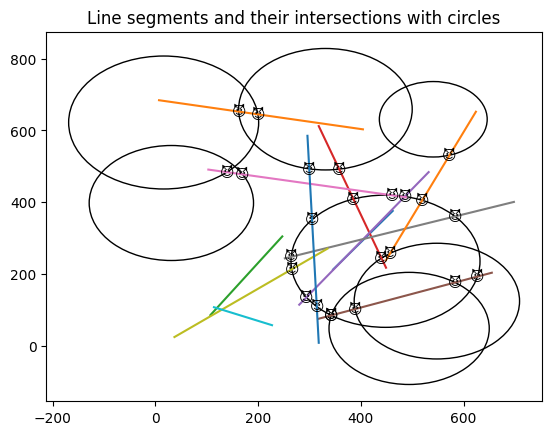

In [3]:
# example
WIDTH,HEIGHT=700,700

# generating some random line segments
def generate_LS(Nsegments=12,eps=10):
    segs=[]
    for _ in range(Nsegments):
        x1,y1=random.randrange(0,WIDTH),random.randrange(0,HEIGHT)
        x2,y2=random.randrange(0,WIDTH),random.randrange(0,HEIGHT)
        if sqrt((x1-y1)**2+(x2-y2)**2)<eps:
            continue
        segs.append(LineSegment((x1,y1),(x2,y2)))
    return segs

# generate some random circles
def generate_circles(Ncircles=7):
    circles=[]
    for i in range(Ncircles):
        x=random.randrange(0,WIDTH)
        y=random.randrange(0,HEIGHT)
        r=random.randrange(100,200)
        circles.append(Circle(x,y,r))
    return circles      

# finding intersections between line segments and circles
def find_intersections(segs,circles):
    points=[]
    for i in range(len(segs)):
        for j in range(len(circles)):
            result=segs[i].intersect(circles[j])
            if result:
                    points.extend(result)
    return points

segs=generate_LS()
circles=generate_circles()
inters=find_intersections(segs,circles)
#getting the current axis
ax=plt.gca()
# displaying the line segments
for seg in segs:
    plt.plot([seg.p0[0],seg.p1[0]],[seg.p0[1],seg.p1[1]],'-')
#displaying the circles
for circle in circles:
    cir=plt.Circle((circle.x,circle.y),circle.r,fill=False)
    ax.add_patch(cir)
# displaying the intersection points
for inter in inters:
    plt.text(inter[0],inter[1],'\U0001F608',va='center',ha='center')
plt.title('Line segments and their intersections with circles')
plt.show()